<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PG/Copy_of_GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# mount google drive

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# read in the data
df = pd.read_csv('/content/sample_data/dataset1_combined.csv')

df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx


**Top Groups with higher Count**

In [4]:
#Obtain the unique counts of Groups 
Ticket_group = df["Assignment group"].value_counts().head(20)
#print(ans_author.tail(5))
plt.figure(figsize=(12,8))
sns.barplot(Ticket_group.values, Ticket_group.index)
plt.xlabel("Count", fontsize=15)
plt.ylabel("Unique groups", fontsize=15)
plt.title("Top 20 Unique groups")
plt.show()

NameError: ignored

**Wordcloud for entire Dataset**


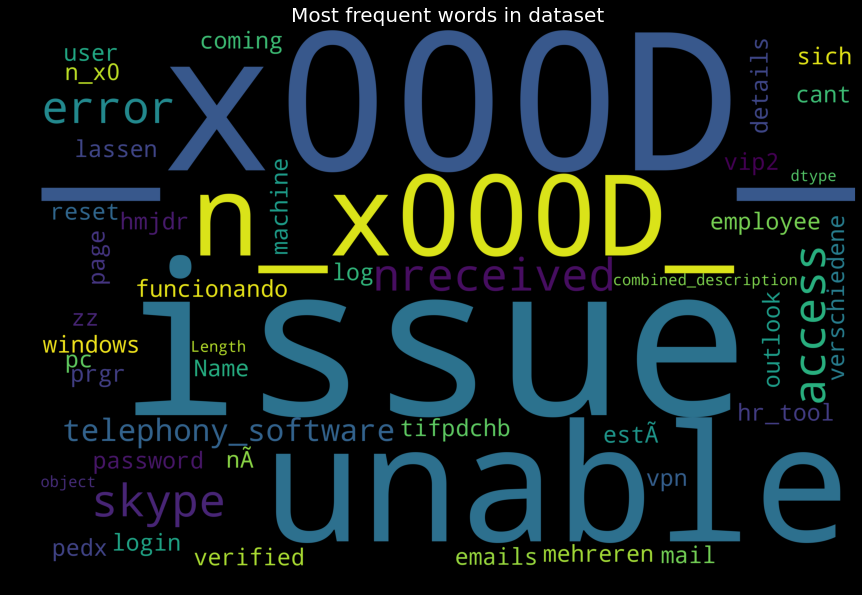

In [ ]:
# importing ploting libraries
import matplotlib.pyplot as plt 
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black',
    stopwords = STOPWORDS)

# generate word cloud for data
wc_word=wc.generate(str(df.combined_description))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

**n-gram analysis of Description from ticket Dataset**

In [ ]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
from collections import defaultdict
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [ ]:
Ticket_desc = df["combined_description"]
from bs4 import BeautifulSoup
#Define empty list
ticket_desc_cleaned = []
res = []
#Define for loop to iterate through the elements of the ticket_desc
for l in Ticket_desc:
    #Parse the contents of the cell
    soup = BeautifulSoup(l, 'html.parser')
    #Find all instances of the text within the </p> tag
    for el in soup.find_all('p'):
        res.append(el.get_text())
    #concatenate the strings from the list    
    endstring = ' '.join(map(str, res))
    #reset list
    res = []
    #Append the concatenated string to the main list
    ticket_desc_cleaned.append(endstring)

In [ ]:
#convert list elements to lower case
import re
ticket_desc_na_cleaned = [item.lower() for item in Ticket_desc]
#remove html links from list 
ticket_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ticket_desc_na_cleaned]
#remove special characters left
ticket_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ticket_desc_na_cleaned]

#convert to dataframe and rename the column of the ticket_desc_na_cleaned list
ticket_desc_clean = pd.DataFrame(np.array(ticket_desc_na_cleaned).reshape(-1))
ticket_desc_clean.columns = ["ans"]
#Squeeze dataframe to obtain series
desc_cleaned = ticket_desc_clean.squeeze()

**generate unigram**

In [ ]:
#generate unigram
ans_unigram = generate_ngrams(desc_cleaned, 1, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


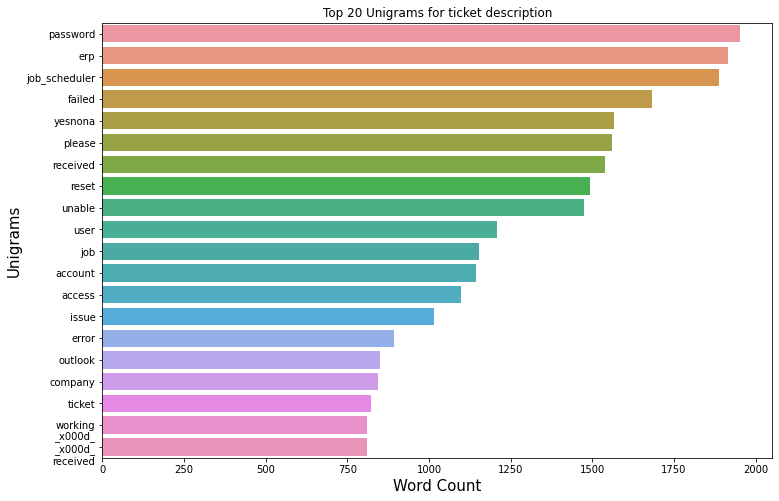

In [ ]:
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 20 Unigrams for ticket description")
plt.show()

**Wordcloud for Unigram**

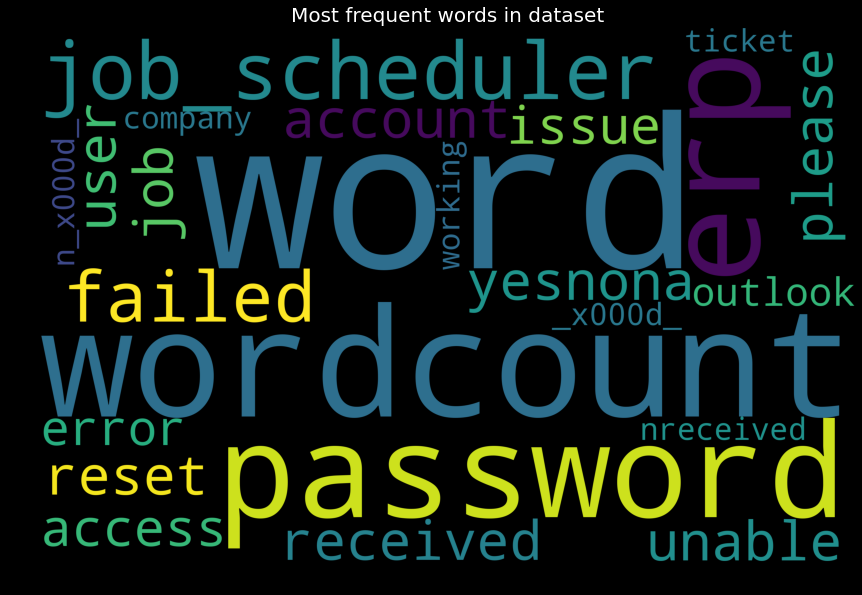

In [ ]:
# importing ploting libraries
import matplotlib.pyplot as plt 
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black',
    stopwords = STOPWORDS)

# generate word cloud for data
wc_word=wc.generate(str(ans_unigram))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

**generate bigram**

In [ ]:
#generate bigram
ans_bigram = generate_ngrams(desc_cleaned, 2, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


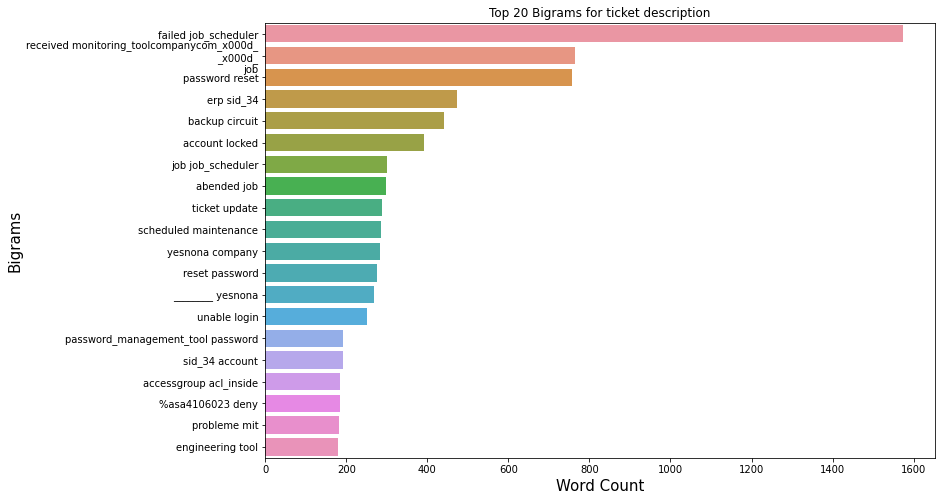

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for ticket description")
plt.show()

**Wordcloud for bigram**`

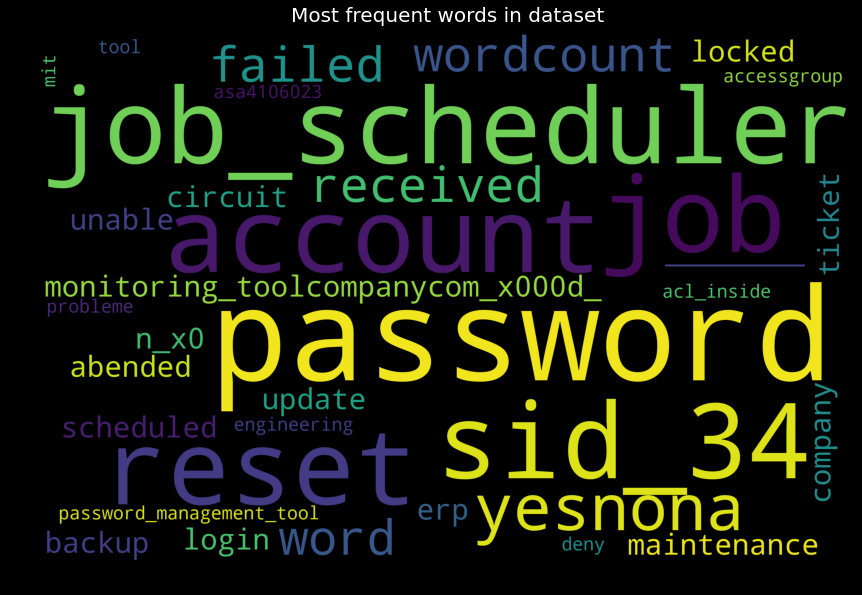

In [ ]:
# importing ploting libraries
import matplotlib.pyplot as plt 
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black',
    stopwords = STOPWORDS)

# generate word cloud for data
wc_word=wc.generate(str(ans_bigram))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

**generate trigram**


In [ ]:
#generate trigram
ans_trigram = generate_ngrams(desc_cleaned, 3, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


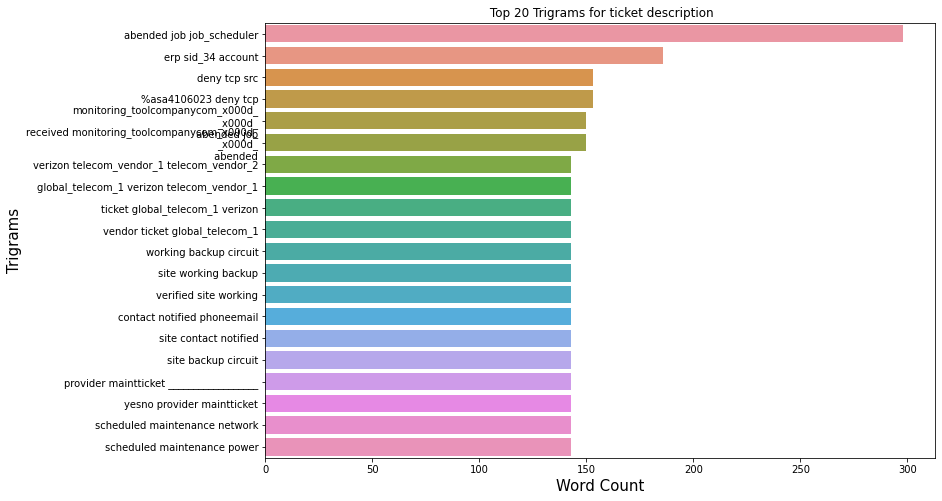

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_trigram["wordcount"],ans_trigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title(" Top 20 Trigrams for ticket description")
plt.show()

**Wordcloud for Trigram**

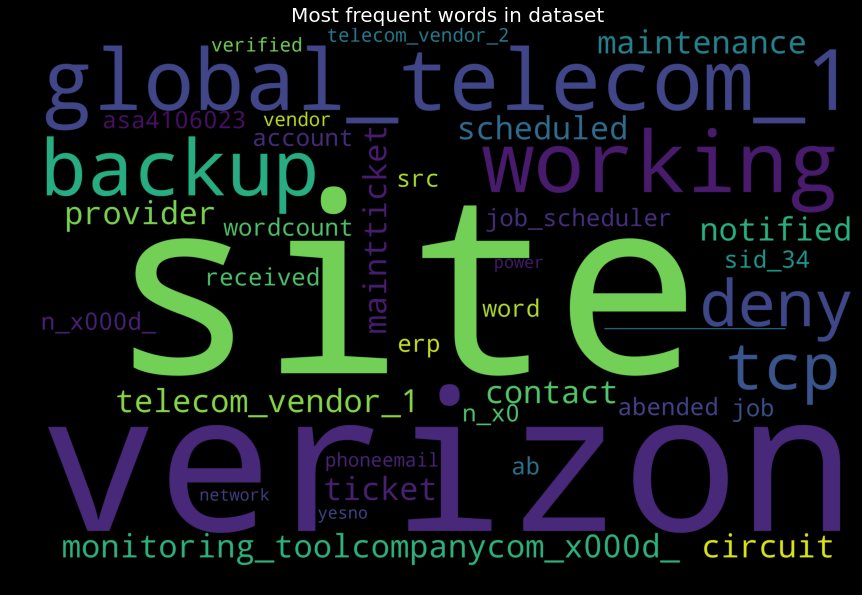

In [ ]:
# importing ploting libraries
import matplotlib.pyplot as plt 
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black',
    stopwords = STOPWORDS)

# generate word cloud for data
wc_word=wc.generate(str(ans_trigram))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

**Few of the grp can be merged as count is less & basis description ticket belong to different group**


In [5]:
df['Assignment group'] = df['Assignment group'].str.replace('GRP_72', 'GRP_0')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_73', 'GRP_0')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_70', 'GRP_0')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_68', 'GRP_0')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_63', 'GRP_0')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_69', 'GRP_2')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_61', 'GRP_10')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_64', 'GRP_10')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_57', 'GRP_6')
df['Assignment group'] = df['Assignment group'].str.replace('GRP_67', 'GRP_22')


In [17]:
df.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

**Deterministic Rule**


In [18]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephonysoftware' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif (df['Caller'][i] == 'dmqxwkfr olmwqzpu' and ('engg' in df[columnName][i] )):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif (df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i] or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('eutool' in df[columnName][i] and 'engineeringtool' in df[columnName][i] and 'engineering tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_25'
      elif('eutool' in df[columnName][i] and 'setup new ws' in df[columnName][i] and 'mit' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'
      elif(df['Caller'][i] == 'rZkBogxib QsEJzdZO' and 'abended job' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_6'
      elif(df['Caller'][i] == 'bpctwhsn kzqsbmtp' and 'failed in jobscheduler' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_6'
      elif ('financeapp' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_55'
      elif ('dynamic' in df[columnName][i] and 'crm' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_40'
      elif ('erp' in df[columnName][i] and 'crm' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_15'
 

In [19]:
deterministicRules(df,'combined_description')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8417 non-null   int64 
 1   Short description            8409 non-null   object
 2   Description                  8416 non-null   object
 3   Caller                       8417 non-null   object
 4   Assignment group             8417 non-null   object
 5   pred_group                   306 non-null    object
 6   combined_description         8417 non-null   object
 7   combined_description_caller  8417 non-null   object
dtypes: int64(1), object(7)
memory usage: 526.2+ KB


In [21]:
df['Assignment group'].value_counts()

GRP_0     3944
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
          ... 
GRP_56       3
GRP_38       3
GRP_71       2
GRP_54       2
GRP_35       1
Name: Assignment group, Length: 64, dtype: int64

In [ ]:
deterministicRules(df_clean,'combined_description')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
df['pred_group'].value_counts()

GRP_23    63
GRP_0     61
GRP_17    49
GRP_15    36
GRP_2     26
GRP_21    21
GRP_22    16
GRP_40    14
GRP_66     7
GRP_12     5
GRP_36     4
GRP_58     4
Name: pred_group, dtype: int64